In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## A) Import Library And Data
### A-1: Import required library

In [7]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, \
                            f1_score, precision_score, recall_score, roc_curve, precision_recall_curve, \
                            mean_squared_error

from collections import Counter
import time
from joblib import dump, load

#import warnings
#warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [6]:
#!pip install numpy #numpy-1.20.2
#!pip install scikit-learn#0.24.1

  Using cached scikit_learn-0.24.1-cp39-cp39-win_amd64.whl (6.9 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [4]:
!pip install pandas # (1.20.2)
!pip install seaborn #seaborn-0.11.1
!pip install matplotlib
!pip install collections
!pip install joblib #joblib-1.0.1

  Using cached pandas-1.2.3-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)


ERROR: Could not find a version that satisfies the requirement collections
ERROR: No matching distribution found for collections


  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


### A-2: Dataset loading

In [9]:
#dataset = pd.read_csv('dataset.csv')
dataset = pd.read_csv("Insurance Dataset.csv")
dataset.head(2)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1


## B) Data Preprocessing

In [10]:
dataset.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

### B-1: Modification in dataframe names and values

In [11]:
# Removing spaces
dataset.columns = dataset.columns.to_series().apply(lambda x: x.replace(' ', '_')).to_list()
dataset.columns = dataset.columns.to_series().apply(lambda x: x.replace('/', '_')).to_list()
dataset.columns.values

array(['Area_Service', 'Hospital_County', 'Hospital_Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl',
       'Admission_type', 'Home_or_self_care,', 'ccs_diagnosis_code',
       'ccs_procedure_code', 'apr_drg_description', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Weight_baby', 'Abortion',
       'Emergency_dept_yes_No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Result',
       'Payment_Typology'], dtype=object)

In [12]:
# Rename the dataframe
dataset.rename(columns={'Home_or_self_care,': 'Home_or_self_care'}, inplace=True)

In [9]:
#data= pd.read_csv('dataset.csv')
#data= pd.read_csv('Insurance_Dataset.csv') 
#data_sample_view = data.head(2)

In [10]:
# for deployment part...sample dataframe view..
#dump(data_sample_view, 'data_sample_view.joblib')
#dump(data_sample_view, 'data_sample_view.pkl')

### B-2: Remove duplications and null values

In [13]:
shape_1 = dataset.shape
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
shape_2 = dataset.shape

In [14]:
print('Shape of data before remove :', shape_1, '\nShape of data after remove  :', shape_2)

Shape of data before remove : (1048575, 24) 
Shape of data after remove  : (1041265, 24)


In [15]:
data_duplicate_count = dataset.duplicated().sum()
data_null_count = dataset.isnull().sum().sum()
print('Duplicate : {d} and Null : {n} '.format(d=data_duplicate_count, n=data_null_count))

Duplicate : 0 and Null : 0 


### B-3: Modify column datatype 

In [16]:
# Datatypes of features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital_County                        1041265 non-null  object 
 2   Hospital_Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home_or_self_care                      1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [15]:
dataset.select_dtypes(include=['object']).head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,apr_drg_description,Surg_Description,Abortion,Emergency_dept_yes_No
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,Other pneumonia,Medical,N,Y
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,Cellulitis & other skin infections,Medical,N,Y


In [16]:
# Convert the Object column into int
dataset.replace({'Days_spend_hsptl': '120 +'}, 120, inplace=True)
dataset.Days_spend_hsptl = dataset.Days_spend_hsptl.astype('int')

# Convert the Object column into int
dataset.Hospital_Id = dataset.Hospital_Id.astype('int')
dataset.Mortality_risk = dataset.Mortality_risk.astype('int')

In [17]:
dataset.select_dtypes(exclude='object').head(2)

,Hospital_Id,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,37,4,122,0,1,1,0,5511.95,5582.49,1.012798,1,1
1,37,4,197,0,3,2,0,4783.20,5162.82,1.079365,1,1


## C) Feature Selection Technique

- As we had seen the feature selection techniques with business problem, survey with findings, top features by algorithms RF and ET in EDA I. Also we analyzed the different model performances by various balancing techniques as well, but the model accuracy isn't improve further and all the model classification report tells unequal distribution for class 0 and class 1 (F1 measures + precision + recall). 
- In this EDA II, based on the analysis having equal features importances and hance we had selected most of the features from the dataset excepting few of them. 

#### C-1 : We have removed the un-releavent features from the data by assuming the below points and observations from previous EDA I part:

1) Removing the features __hospital_id__ which are not significant with respect to the output variable "result", this features can't tell whether the claims are of valid or invalid.

2) The APR-DRG Classification Code Description specifies description categories about the diseases, illness, etc. We are able to collect failry the desciptions from the code illness and hence we are removing the feature __apr_drg_description__.

3) Gender feature has __unknown__ values which are less in counts (27) with respect to the counts of Male and Female, So we removed it.

4) Feature __abortion__ has only 0 values and its lead towards constant variance. Due to this constant and low variance feature among all, so we are removing it.

7) We are going to remove the feature __Weight_baby__ as 90% of the data belongs to 0 category with outliers.

In [17]:
dataset.drop(['Hospital_Id', 'apr_drg_description', 'Abortion', 'Weight_baby'], axis=1, inplace=True)

In [19]:
dataset.head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,1,1,Medical,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,3,2,Medical,Y,4783.20,5162.82,1.079365,1,1


In [18]:
dataset.columns

Index(['Area_Service', 'Hospital_County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home_or_self_care',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Emergency_dept_yes_No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [21]:
dataset.to_csv('dataset_for_imb_trials.csv')

## D) Feature Encoding Technique

In [20]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
label = LabelEncoder()
label_binizer =LabelBinarizer()

In [22]:
dataset.select_dtypes(include=['object']).head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,Surg_Description,Emergency_dept_yes_No
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,Medical,Y
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,Medical,Y


In [23]:
categorical_col_name = []
cnt_a = 0

for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()):
        categorical_col_name.append(column)
        cnt_a += 1
        print(f"{cnt_a}) {column} : {dataset[column].nunique()}")
        print("------------------------------------")
        print(f"{dataset[column].value_counts()}")
        print("====================================\n\n")

1) Area_Service : 7
------------------------------------
Hudson Valley      260070
Western NY         179370
Central NY         170223
Capital/Adirond    170054
Finger Lakes       155504
New York City       74307
Southern Tier       31737
Name: Area_Service, dtype: int64


2) Hospital_County : 51
------------------------------------
Erie           128255
Westchester    126622
Monroe         110066
Onondaga        80432
Bronx           74307
Albany          61542
Orange          39665
Rockland        35344
Oneida          34080
Dutchess        32141
Broome          29742
Schenectady     23069
Niagara         21064
Chemung         16667
Warren          15459
Rensselaer      13857
Ulster          13606
Otsego          13206
Chautauqua      12757
St Lawrence     12269
Ontario         11987
Jefferson       11923
Clinton          9919
Saratoga         8923
Steuben          8798
Putnam           7005
Tompkins         6953
Montgomery       6454
Columbia         6315
Oswego           6103
Frank

In [24]:
# LabelEncoder features
label_area = label.fit(dataset.Area_Service)
label_Hospital_County = label.fit(dataset.Hospital_County)
label_Age = label.fit(dataset.Age)
label_Cultural_group = label.fit(dataset.Cultural_group)
label_ethnicity= label.fit(dataset.ethnicity)
label_Admission_type = label.fit(dataset.Admission_type)
label_Home_or_self_care = label.fit(dataset.Home_or_self_care)

# LabelBinarizer features
one_hot_Gender = label_binizer.fit(dataset.Gender)
one_hot_Surg_Description = label_binizer.fit(dataset.Surg_Description)
one_hot_Emergency_dept_yes_No = label_binizer.fit(dataset.Emergency_dept_yes_No)

In [25]:
label_encoder_list = [label_area, label_Hospital_County,
                label_Age, label_Cultural_group,
                label_ethnicity, label_Admission_type,
                label_Home_or_self_care]

one_hot_coder_list = [one_hot_Gender, one_hot_Surg_Description, one_hot_Emergency_dept_yes_No]

#### Pickling the encoding object & columns

In [26]:
dump(label_encoder_list, 'label_encoder_list.joblib')

['label_encoder_list.joblib']

In [27]:
dump(one_hot_coder_list, 'one_hot_coder_list.joblib')

['one_hot_coder_list.joblib']

In [28]:
label_to_column = ['Area_Service', 'Hospital_County',
                  'Age', 'Cultural_group', 'ethnicity',
                  'Admission_type', 'Home_or_self_care']

one_hot_column = ['Gender', 'Surg_Description', 'Emergency_dept_yes_No']

In [29]:
dump(label_to_column, 'label_to_column.joblib')

['label_to_column.joblib']

In [30]:
dump(one_hot_column, 'one_hot_column.joblib')

['one_hot_column.joblib']

In [32]:
# applyibng label encoding on columns..also this below cells can be used in deployment as well

In [31]:
j = 0
for i in label_to_column:
    dataset[i] = label_encoder_list[j].fit_transform(dataset[i])
    j =+1

In [34]:
# applyibng one hot encoding on columns..also this below cells can be used in deployment as well

In [32]:
k = 0
for i in one_hot_column:
    dataset[i] = one_hot_coder_list[k].fit_transform(dataset[i])
    k =+1

In [36]:
dataset.head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,6,1,2,1,3,0,4,0,7,122,0,1,1,0,1,5511.95,5582.49,1.012798,1,1
1,6,1,4,1,3,0,4,5,17,197,0,3,2,0,1,4783.20,5162.82,1.079365,1,1


In [33]:
data_duplicate_count = dataset.duplicated().sum()
data_null_count = dataset.isnull().sum().sum()
print('Duplicate : {d} and Null : {n} '.format(d=data_duplicate_count, n=data_null_count))

Duplicate : 12240 and Null : 0 


In [38]:
dataset.to_csv('Dataset_for_models_2.csv')

In [74]:
dataset.columns

Index(['Area_Service', 'Hospital_County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home_or_self_care',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Emergency_dept_yes_No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [75]:
dataset["Days_spend_hsptl"].unique()  #### Removing noise in days spend hsptl col of "+ 120"
d1=dataset.iloc[:,6].values
d1=[v.replace(" +","") for v in d1]
dataset.iloc[:,6]=d1
dataset.iloc[:,6].unique().shape[0]

120

In [39]:
#dataset = pd.read_csv('Dataset_for_models_2.csv')
#dataset.drop(['Unnamed: 0'], inplace = True, axis = 1)  
#dataset.head(2)

## E) Data Balancing Strategy + Model Building + Model Performance Analysis

Below are the strategies to deal with the unbalanced dataset and we have analysed the model performance based on these.


### E) Upsampling strategy
__E:1-__ Upsample the minority class before spliting

__E:2-__ Upsample the minority class after spliting
***
### F) Model selection strategy
__F:1-__ StratifiedKFold with random forest

__F:2-__ train_test_split with random forest
****

#### E:i- Extracting few samples from whole dataset for model analysis

In [76]:
# taking 5% sample data from whole dataset
sample_data = dataset.sample(frac=0.02)

# checking for result column unique values counts..
sample_data.Result.value_counts()

1    15521
0     5304
Name: Result, dtype: int64

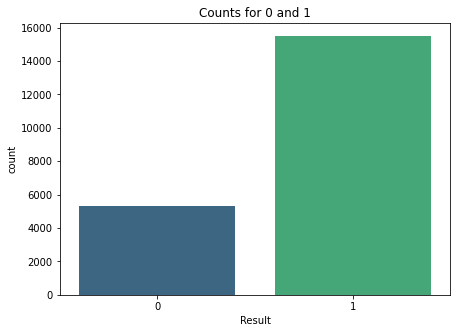

In [35]:
# Check out the result feature proportions
plt.subplots(figsize=(7, 5))
sns.countplot(x = sample_data.Result, palette = 'viridis')
plt.title('Counts for 0 and 1')
plt.show()

## E:1- Upsample the minority class before spliting
__Before Spliting__ the Dataset, Upsample the minority classes to make equal proportion with majority classes.

In [36]:
# seperating '0', & '1' label
sample_minority = sample_data.loc[sample_data['Result']==0]
sample_majority = sample_data.loc[sample_data['Result']==1]

In [37]:
# Doing upsampling of minority classes
from sklearn.utils import resample

# [Taking ratio as 100:80(%)]
sample_data_minority_upsampled = resample(sample_minority , replace=True, n_samples=12000, random_state=42) 

In [38]:
# Combining upsampled data to majority class data
sample_data_upsampled = pd.concat([sample_majority, sample_data_minority_upsampled], ignore_index=True)

In [49]:
sample_data_upsampled.Result.value_counts()

1    15499
0    12000
Name: Result, dtype: int64

93

In [48]:
sample_data_upsampled["Days_spend_hsptl"].unique()

array(['1', '2', '4', '24', '8', '3', '19', '7', '5', '10', '11', '12',
       '9', '13', '16', '6', '21', '28', '43', '29', '18', '14', '96',
       '49', '15', '33', '41', '31', '27', '47', '23', '75', '48', '32',
       '45', '35', '20', '39', '30', '46', '17', '54', '55', '25', '37',
       '68', '120', '22', '38', '94', '70', '42', '40', '88', '80', '95',
       '36', '44', '66', '51', '34', '53', '104', '64', '85', '26', '62',
       '81', '72', '58', '71', '56', '74', '78', '73', '103', '110', '89',
       '98', '112', '77', '50', '69', '115', '61', '59', '105', '57',
       '109', '111', '82', '116', '87'], dtype=object)

__Observation:__

    Initial class ratio on sample data                      Final class ratio on sample data
       
      class 1 - 15618                                           class 1 - 15618
      class 0 - 5247                                            class 0 - 12000
      

In [50]:
# seperating indepedent & depedent variabales..
x = sample_data_upsampled.drop(['Result'],axis=1).values
y = sample_data_upsampled.Result.values

### F:1- StratifiedKFold with random forest (n_estimators = 100)

In [51]:
skf_15 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 

for train_index, test_index in skf_15.split(x, y): 
    x_train_fold, x_test_fold = x[train_index], x[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index]

In [52]:
sample_RF_upsampled1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sample1 = sample_RF_upsampled1.fit(x_train_fold, y_train_fold)

In [53]:
y_pred_train = clf_sample1.predict(x_train_fold)
y_pred = clf_sample1.predict(x_test_fold)

In [54]:
print(classification_report(y_train_fold, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10800
           1       1.00      1.00      1.00     13950

    accuracy                           1.00     24750
   macro avg       1.00      1.00      1.00     24750
weighted avg       1.00      1.00      1.00     24750



In [55]:
print(classification_report(y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1200
           1       0.90      0.94      0.92      1549

    accuracy                           0.91      2749
   macro avg       0.91      0.90      0.90      2749
weighted avg       0.91      0.91      0.91      2749



In [56]:
%%time
cvs_clf_sample1 = cross_val_score(clf_sample1, x, y, cv = 5)
cvs_clf_sample1 

Wall time: 44.3 s


array([0.89563636, 0.90381818, 0.89509091, 0.90290909, 0.89288962])

In [57]:
np.array(cvs_clf_sample1).mean()

0.8980688323496834

### F:2- trainTest split with random forest (n_estimators = 100)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=96)

In [59]:
sample_RF_upsampled2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sample2 = sample_RF_upsampled2.fit(x_train, y_train)

In [60]:
y_pred_train = clf_sample2.predict(x_train)
y_pred = clf_sample2.predict(x_test)

In [61]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8400
           1       1.00      1.00      1.00     10849

    accuracy                           1.00     19249
   macro avg       1.00      1.00      1.00     19249
weighted avg       1.00      1.00      1.00     19249



In [62]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      3600
           1       0.86      0.92      0.89      4650

    accuracy                           0.87      8250
   macro avg       0.88      0.86      0.87      8250
weighted avg       0.87      0.87      0.87      8250



In [59]:
%%time
cvs_clf_sample2 = cross_val_score(clf_sample2, x, y, cv = 5)
cvs_clf_sample2

CPU times: user 30.6 s, sys: 46.8 ms, total: 30.6 s
Wall time: 30.8 s


In [60]:
np.array(cvs_clf_sample2).mean()

0.9016629509126574

* Stratified k-fold gives best results __0.92__ over the regular spliting method __0.87__

## E:2- Upsample the minority class after spliting
__After Spliting__ the Dataset, Upsample the minority classes to make equal proportion with majority classes.

In [77]:
x1 = sample_data.drop(['Result'],axis=1).values
y1 = sample_data.Result.values

### F:1- StratifiedKFold with random forest (n_estimators = 100)

In [78]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
   
for train_index, test_index in skf.split(x1, y1): 
    x_train_fold, x_test_fold = x1[train_index], x1[test_index] 
    y_train_fold, y_test_fold = y1[train_index], y1[test_index]

In [79]:
Counter(y_train_fold)

Counter({1: 13969, 0: 4774})

In [80]:
x_train_df = pd.DataFrame(x_train_fold, columns=sample_data.drop(['Result'],axis=1).columns)
y_train_df = pd.DataFrame(y_train_fold, columns=['Result'])

df_train = pd.concat([x_train_df, y_train_df],axis=1)

In [81]:
df_train_majority = df_train.loc[df_train['Result']==1]
df_train_minority = df_train.loc[df_train['Result']==0]

In [68]:
df_train_majority.shape

(13949, 20)

In [69]:
df_train_minority.shape

(4794, 20)

In [82]:
# doing upsampling of minority classes
from sklearn.utils import resample
# [taking ratio as 100:80(%)]
df_train_minority_upsampled = resample(df_train_minority , replace=True, n_samples=11245, random_state=42)

In [83]:
after_split_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

In [84]:
# splitting into x_train, y_train only..
# Note: we have alerady splitted test sets using k fold...

x_train_k_fold_upsampled = after_split_upsampled.drop(['Result'],axis=1).values
y_train_k_fold_upsampled = after_split_upsampled.Result.values

In [85]:
from sklearn.ensemble import RandomForestClassifier
sample_RF15_after_split_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

sample_RF15_after_split_upsampled.fit(x_train_k_fold_upsampled, y_train_k_fold_upsampled)

RandomForestClassifier(n_estimators=15, random_state=42)

In [86]:
y_pred_train = sample_RF15_after_split_upsampled.predict(x_train_k_fold_upsampled)
y_pred = sample_RF15_after_split_upsampled.predict(x_test_fold)

In [87]:
print(classification_report(y_train_k_fold_upsampled, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11245
           1       1.00      1.00      1.00     13969

    accuracy                           1.00     25214
   macro avg       1.00      1.00      1.00     25214
weighted avg       1.00      1.00      1.00     25214



In [88]:
print(classification_report(y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.11      0.16       530
           1       0.75      0.89      0.81      1552

    accuracy                           0.69      2082
   macro avg       0.50      0.50      0.48      2082
weighted avg       0.62      0.69      0.65      2082



### F:2- Train Test split with random forest (n_estimators = 100)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, stratify=y1, test_size=0.3, random_state=96)

In [90]:
x_train_df1 = pd.DataFrame(x_train, columns=sample_data.drop(['Result'],axis=1).columns)
y_train_df1 = pd.DataFrame(y_train, columns=['Result'])

df_train1 = pd.concat([x_train_df1, y_train_df1],axis=1)

In [91]:
df_train_majority1 = df_train1.loc[df_train['Result']==1]
df_train_minority1 = df_train1.loc[df_train['Result']==0]

In [78]:
df_train_majority1.shape

(10914, 20)

In [79]:
df_train_minority1.shape

(3663, 20)

In [92]:
# doing upsampling of minority classes
from sklearn.utils import resample
# [taking ratio as 100:80(%)]
df_train_minority_upsampled1 = resample(df_train_minority1 , replace=True, n_samples=8713, random_state=42)

In [93]:
after_split_upsampled1 = pd.concat([df_train_majority1, df_train_minority_upsampled1])

In [94]:
# splitting into x_train, y_train only..
# Note: we have alerady splitted test sets using train test slpit...

x_train_upsampled1 = after_split_upsampled1.drop(['Result'],axis=1).values
y_train_upsampled1 = after_split_upsampled1.Result.values

In [95]:
sample_RF_upsampled2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sample2 = sample_RF_upsampled2.fit(x_train_upsampled1, y_train_upsampled1)

In [96]:
y_pred_train = clf_sample2.predict(x_train)
y_pred = clf_sample2.predict(x_test)

In [97]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3713
           1       0.99      1.00      1.00     10864

    accuracy                           0.99     14577
   macro avg       1.00      0.99      0.99     14577
weighted avg       0.99      0.99      0.99     14577



In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.02      0.03      1591
           1       0.74      0.97      0.84      4657

    accuracy                           0.73      6248
   macro avg       0.45      0.49      0.44      6248
weighted avg       0.60      0.73      0.64      6248



__Observatoins__:
- Upsamppling technique before the spliting is the best choice for balancing the dataset where StratifiedKFold is good (92%) ahead of train_test_split (87%)


- Upsampling technique after the spliting is not much efficient for balancing the dataset where StratifiedKFold is good (70%) ahead of train_test_split (74%)

## G) Final Model Building

- From the observations with above section (E), we have select approach like __upsampling__ before the the split with __classifier random forest__.
- We have use __train_test_split()__ method for spliting the dependent and independent features including stratify and for cross validation, we have use __StratifiedKFold__ as the data is unbalanced.

### G:1- Upsampling the minority data

In [99]:
data_minority = dataset.loc[dataset['Result']==0]
data_majority = dataset.loc[dataset['Result']==1]

In [100]:
data_minority.shape

(260904, 20)

In [101]:
data_majority.shape

(780361, 20)

In [90]:
780361*0.85

663306.85

In [102]:
from sklearn.utils import resample
# doing upsampling of minority classes
# [taking ratio as 100:85(%)]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=663307, random_state=42)

In [103]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled], ignore_index=True)

In [104]:
from sklearn.utils import shuffle

data_upsampled = shuffle(data_upsampled)
print(data_upsampled.shape)
data_upsampled.Result.value_counts()

(1443668, 20)


1    780361
0    663307
Name: Result, dtype: int64

In [105]:
X = data_upsampled.drop(['Result'],axis=1).values
Y = data_upsampled.Result.values

### G:2- Model building (split: train-test)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=101)

In [107]:
%%time
from sklearn.ensemble import RandomForestClassifier
model_RF_upsampled = RandomForestClassifier(n_estimators=17, random_state=81) 

model_RF_upsampled.fit(X_train, Y_train)

Wall time: 4min 49s


RandomForestClassifier(n_estimators=17, random_state=81)

### G:3- Model testing and evaluation

In [108]:
Y_pred_train = model_RF_upsampled.predict(X_train)
Y_pred_test = model_RF_upsampled.predict(X_test)
Y_pred_whole = model_RF_upsampled.predict(dataset.drop(['Result'],axis=1))

In [109]:
print('ROC-AUC score          :', roc_auc_score(Y_test, Y_pred_test))
print('\nAccuracy score (train) :', accuracy_score(Y_train, Y_pred_train)) # Accuracy classification score
print('\nAccuracy score (test)  :', accuracy_score(Y_test, Y_pred_test)) # Accuracy classification score
print('\nF1 score               :', f1_score(Y_test, Y_pred_test))
print('\nConfusion matrix :\n', confusion_matrix(Y_test, Y_pred_test))
print('\nclassification report :\n', classification_report(Y_test, Y_pred_test))

ROC-AUC score          : 0.8721892625629463

Accuracy score (train) : 0.9934550372575403

Accuracy score (test)  : 0.8717989568253133

F1 score               : 0.8797252422326343

Confusion matrix :
 [[116345  16317]
 [ 20699 135373]]

classification report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86    132662
           1       0.89      0.87      0.88    156072

    accuracy                           0.87    288734
   macro avg       0.87      0.87      0.87    288734
weighted avg       0.87      0.87      0.87    288734



### G:4- Model evaluation review for classes

In [110]:
# Training set
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    530645
           1       0.99      0.99      0.99    624289

    accuracy                           0.99   1154934
   macro avg       0.99      0.99      0.99   1154934
weighted avg       0.99      0.99      0.99   1154934



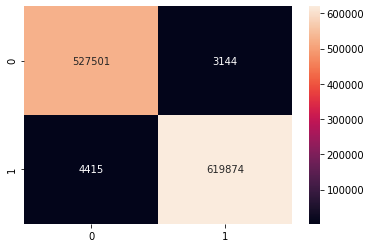

In [112]:
# Training set
sns.heatmap(confusion_matrix(Y_train, Y_pred_train), annot=True, fmt='.7g' )
plt.show()

In [113]:
# Testing set
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86    132662
           1       0.89      0.87      0.88    156072

    accuracy                           0.87    288734
   macro avg       0.87      0.87      0.87    288734
weighted avg       0.87      0.87      0.87    288734



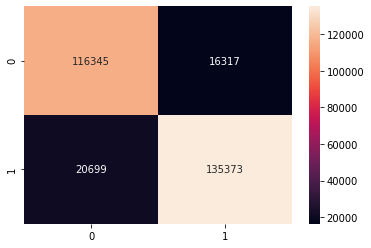

In [114]:
# Testing set
sns.heatmap(confusion_matrix(Y_test, Y_pred_test), annot=True, fmt='.7g' )
plt.show()

In [115]:
# Unseen dataset (whole)
print(classification_report(dataset.Result.values, Y_pred_whole))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89    260904
           1       0.96      0.97      0.96    780361

    accuracy                           0.95   1041265
   macro avg       0.93      0.92      0.93   1041265
weighted avg       0.94      0.95      0.94   1041265



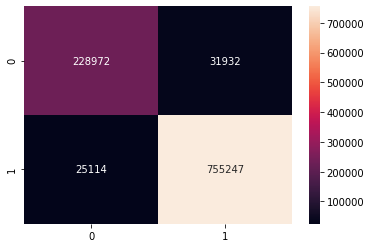

In [116]:
# Unseen dataset (whole)
sns.heatmap(confusion_matrix(dataset.Result.values, Y_pred_whole), annot=True, fmt='.7g' )
plt.show()

### G:5- Model cross validation (Unseen dataset)

In [117]:
# seperating indepedent & depedent variabales..
X1 = dataset.drop(['Result'],axis=1).values
Y1 = dataset.Result.values

In [118]:
%%time
# Model cross validation (Unseen dataset)
# Note: it takes long time to cross validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=256) 

lst_accu_stratified = [] 

for train_index, test_index in skf.split(X1, Y1): 
    print('train:', train_index, 'validation: ', test_index)
    x_train_fold, x_test_fold = X1[train_index], X1[test_index] 
    y_train_fold, y_test_fold = Y1[train_index], Y1[test_index] 
    
    model_RF_upsampled.fit(x_train_fold, y_train_fold) 

    lst_accu_stratified.append(model_RF_upsampled.score(x_test_fold, y_test_fold)) 

# Print the output. 
print("-------------------------------------------------------------------")

print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

train: [      0       1       2 ... 1041262 1041263 1041264] validation:  [      5       7      10 ... 1041257 1041259 1041261]
train: [      1       2       3 ... 1041262 1041263 1041264] validation:  [      0      12      19 ... 1041251 1041255 1041258]
train: [      0       1       2 ... 1041262 1041263 1041264] validation:  [      3       4      11 ... 1041243 1041248 1041253]


KeyboardInterrupt: 

In [107]:
%%time
# # # checking cross value score...
cvs_rf_whole = cross_val_score(model_RF_upsampled, X1, Y1, cv=5) # Note: it takes long time to cross validate
print(cvs_rf_whole)
np.array(cvs_rf_whole).mean()

[0.72682746 0.73066414 0.71999443 0.72989585 0.71989839]
CPU times: user 7min 41s, sys: 2.18 s, total: 7min 43s
Wall time: 7min 48s


In [108]:
%%time
# Model cross validation (Test data)
# Note: it takes long time to cross validate

skf_test = StratifiedKFold(n_splits=5, shuffle=True, random_state=256) 

lst_accu_stratified1 = [] 

for train_index, test_index in skf_test.split(X, Y): 
    print('train:', train_index, 'validation: ', test_index)
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    
    model_RF_upsampled.fit(x_train_fold, y_train_fold) 

    lst_accu_stratified1.append(model_RF_upsampled.score(x_test_fold, y_test_fold)) 

# Print the output. 
print("-------------------------------------------------------------------")

print('List of possible accuracy:', lst_accu_stratified1) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified1)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified1)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified1)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified1))

train: [      0       1       2 ... 1443663 1443664 1443667] validation:  [      6       7       9 ... 1443661 1443665 1443666]
train: [      2       3       4 ... 1443665 1443666 1443667] validation:  [      0       1      17 ... 1443632 1443647 1443651]
train: [      0       1       2 ... 1443665 1443666 1443667] validation:  [      3       5      11 ... 1443648 1443653 1443662]
train: [      0       1       3 ... 1443663 1443665 1443666] validation:  [      2       4      10 ... 1443660 1443664 1443667]
train: [      0       1       2 ... 1443665 1443666 1443667] validation:  [      8      26      30 ... 1443644 1443655 1443663]
-------------------------------------------------------------------
List of possible accuracy: [0.8719651998032791, 0.8725782207845283, 0.8731669979981574, 0.8720582683655834, 0.8719024150339587]

Maximum Accuracy That can be obtained from this model is: 87.31669979981575 %

Minimum Accuracy: 87.19024150339587 %

Overall Accuracy: 87.23342203971015 %

Standa

### G:6- AUC-ROC curve (Testing set)

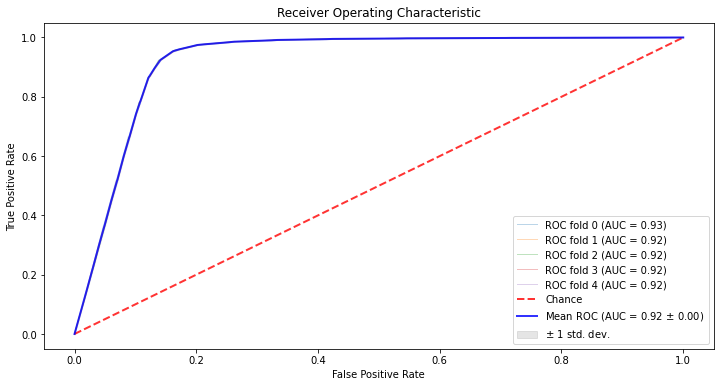

CPU times: user 12min 11s, sys: 1.5 s, total: 12min 12s
Wall time: 12min 16s


In [111]:
%%time
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=147)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(12,6))
for i, (train, test) in enumerate(cv.split(X, Y)):
    model_RF_upsampled.fit(X[train], Y[train])
    viz = plot_roc_curve(model_RF_upsampled, X[test], Y[test], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic")
ax.legend(loc="lower right")
plt.show()

### H:2- Model building (split: StratifiedKFold)

In [112]:
skf_m = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 

for train_index, test_index in skf_m.split(X, Y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf_samplem = RandomForestClassifier(n_estimators=17, random_state=81) 

clf_samplem.fit(X_train_fold, Y_train_fold)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=81, verbose=0,
                       warm_start=False)

### H:3- Model testing and evaluation

In [114]:
y_pred_train = clf_samplem.predict(X_train_fold)
y_pred = clf_samplem.predict(X_test_fold)
Y_pred_whole = clf_samplem.predict(dataset.drop(['Result'],axis=1))

In [115]:
print('ROC-AUC score          :', roc_auc_score(Y_test_fold, y_pred))
print('\nAccuracy score (train) :', accuracy_score(Y_train_fold, y_pred_train)) # Accuracy classification score
print('\nAccuracy score (test)  :', accuracy_score(Y_test_fold, y_pred)) # Accuracy classification score
print('\nF1 score               :', f1_score(Y_test_fold, y_pred))
print('\nConfusion matrix :\n', confusion_matrix(Y_test_fold, y_pred))
print('\nclassification report :\n', classification_report(Y_test_fold, y_pred))

ROC-AUC score          : 0.8925683646363081

Accuracy score (train) : 0.9934026115560509

Accuracy score (test)  : 0.891920535306097

F1 score               : 0.8984582945574999

Confusion matrix :
 [[59734  6596]
 [ 9007 69029]]

classification report :
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     66330
           1       0.91      0.88      0.90     78036

    accuracy                           0.89    144366
   macro avg       0.89      0.89      0.89    144366
weighted avg       0.89      0.89      0.89    144366



### H:4- Model evaluation review for classes

In [116]:
#Training set
print(classification_report(Y_train_fold, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    596977
           1       1.00      0.99      0.99    702325

    accuracy                           0.99   1299302
   macro avg       0.99      0.99      0.99   1299302
weighted avg       0.99      0.99      0.99   1299302



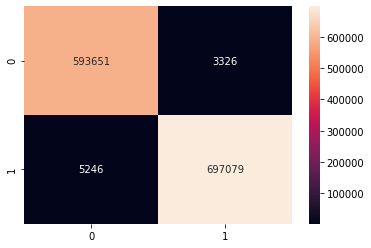

In [117]:
#Training set
sns.heatmap(confusion_matrix(Y_train_fold, y_pred_train), annot=True, fmt='.7g' )
plt.show()

In [118]:
# Testing set
print(classification_report(Y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     66330
           1       0.91      0.88      0.90     78036

    accuracy                           0.89    144366
   macro avg       0.89      0.89      0.89    144366
weighted avg       0.89      0.89      0.89    144366



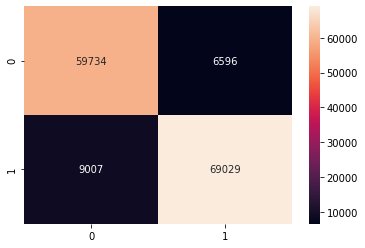

In [119]:
# Testing set
sns.heatmap(confusion_matrix(Y_test_fold, y_pred), annot=True, fmt='.7g' )
plt.show()

In [120]:
# Unseen dataset (whole)
print(classification_report(dataset.Result.values, Y_pred_whole))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92    260904
           1       0.97      0.98      0.97    780361

    accuracy                           0.96   1041265
   macro avg       0.96      0.94      0.95   1041265
weighted avg       0.96      0.96      0.96   1041265



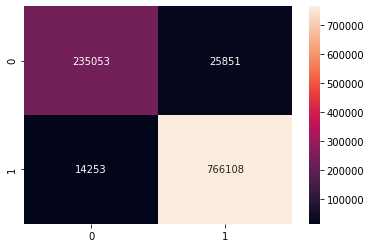

In [121]:
# Unseen dataset (whole)
sns.heatmap(confusion_matrix(dataset.Result.values, Y_pred_whole), annot=True, fmt='.7g' )
plt.show()

### H:5- Model cross validation (Unseen dataset)

In [122]:
# seperating indepedent & depedent variabales..
X1 = dataset.drop(['Result'],axis=1).values
Y1 = dataset.Result.values

In [123]:
%%time
# Model cross validation (Unseen dataset)
# Note: it takes long time to cross validate

skf_h = StratifiedKFold(n_splits=5, shuffle=True, random_state=256) 

lst_accu_stratified_h = [] 

for train_index, test_index in skf_h.split(X1, Y1): 
    print('train:', train_index, 'validation: ', test_index)
    x_train_fold, x_test_fold = X1[train_index], X1[test_index] 
    y_train_fold, y_test_fold = Y1[train_index], Y1[test_index] 
    
    clf_samplem.fit(x_train_fold, y_train_fold) 

    lst_accu_stratified_h.append(model_RF_upsampled.score(x_test_fold, y_test_fold)) 

# Print the output. 
print("-------------------------------------------------------------------")

print('List of possible accuracy:', lst_accu_stratified_h) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified_h)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified_h)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified_h)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified_h))

train: [      0       1       2 ... 1041262 1041263 1041264] validation:  [      5       7      10 ... 1041257 1041259 1041261]
train: [      1       2       3 ... 1041262 1041263 1041264] validation:  [      0      12      19 ... 1041251 1041255 1041258]
train: [      0       1       2 ... 1041262 1041263 1041264] validation:  [      3       4      11 ... 1041243 1041248 1041253]
train: [      0       3       4 ... 1041259 1041261 1041263] validation:  [      1       2       8 ... 1041260 1041262 1041264]
train: [      0       1       2 ... 1041261 1041262 1041264] validation:  [      6       9      17 ... 1041246 1041247 1041263]
-------------------------------------------------------------------
List of possible accuracy: [0.9451388455388398, 0.9449611770298627, 0.9449515733266748, 0.9450524122101482, 0.946036791786913]

Maximum Accuracy That can be obtained from this model is: 94.60367917869131 %

Minimum Accuracy: 94.49515733266747 %

Overall Accuracy: 94.52281599784878 %

Standar

In [124]:
%%time
# Model cross validation (Test data)
# Note: it takes long time to cross validate

skf_h1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=256) 

lst_accu_stratified_h1 = [] 

for train_index, test_index in skf_h1.split(X, Y): 
    print('train:', train_index, 'validation: ', test_index)
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    
    clf_samplem.fit(x_train_fold, y_train_fold) 

    lst_accu_stratified_h1.append(model_RF_upsampled.score(x_test_fold, y_test_fold)) 

# Print the output. 
print("-------------------------------------------------------------------")

print('List of possible accuracy:', lst_accu_stratified_h1) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified_h1)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified_h1)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified_h1)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified_h1))

train: [      0       1       2 ... 1443663 1443664 1443667] validation:  [      6       7       9 ... 1443661 1443665 1443666]
train: [      2       3       4 ... 1443665 1443666 1443667] validation:  [      0       1      17 ... 1443632 1443647 1443651]
train: [      0       1       2 ... 1443665 1443666 1443667] validation:  [      3       5      11 ... 1443648 1443653 1443662]
train: [      0       1       3 ... 1443663 1443665 1443666] validation:  [      2       4      10 ... 1443660 1443664 1443667]
train: [      0       1       2 ... 1443665 1443666 1443667] validation:  [      8      26      30 ... 1443644 1443655 1443663]
-------------------------------------------------------------------
List of possible accuracy: [0.9692311954948153, 0.9690337819584808, 0.9692623660531839, 0.9690198210803753, 0.9692934302625609]

Maximum Accuracy That can be obtained from this model is: 96.92934302625609 %

Minimum Accuracy: 96.90198210803753 %

Overall Accuracy: 96.91681189698834 %

Standa

### H:6- AUC-ROC curve (Testing set)

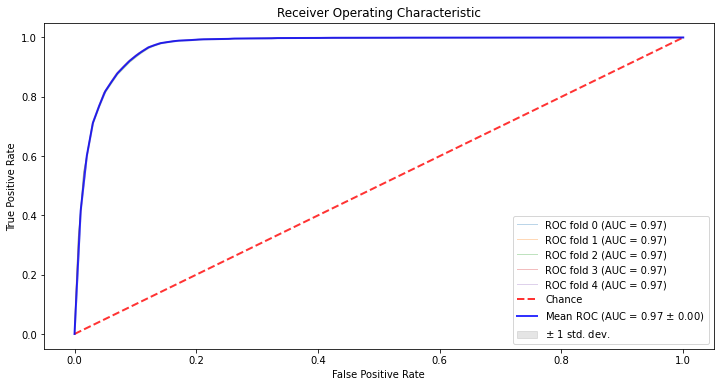

CPU times: user 7min 57s, sys: 698 ms, total: 7min 58s
Wall time: 8min 1s


In [125]:
%%time
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=147)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(12,6))
for i, (train, test) in enumerate(cv.split(X1, Y1)):
    clf_samplem.fit(X1[train], Y1[train])
    viz = plot_roc_curve(model_RF_upsampled, X1[test], Y1[test], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic")
ax.legend(loc="lower right")
plt.show()

## I) Saving The Model

In [121]:
from joblib import dump, load
# model 1 (spliting : train_test_split)
dump(model_RF_upsampled, 'model_RF_upsampled_87.joblib')
dump(model_RF_upsampled, 'model_RF_upsampled_87.pkl') 

# model 2 (spliting: StratifiedKFold split)
#dump(clf_samplem, 'model_RF_upsampled_89.joblib')
#dump(clf_samplem, 'model_RF_upsampled_89.pkl')

['model_RF_upsampled_87.pkl']